<a href="https://colab.research.google.com/github/DM2003/OIBSIP/blob/main/OIBSIP_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: Debangan Mukherjee

In [1]:
# TASK 3
# Oasis InfoByte Data Science Internship
# Car Price Prediction
# Dataset: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_data = pd.read_csv('/content/CAR_PRICE_PREDICTION_OIBSIP.zip')

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

Thus there are 301 rows and 9 columns

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Thus, there are no missing values to handle

In [9]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
car_data['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [12]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

VISUALIZATIONS OF THE DATASET

<ipython-input-13-fa580b46258e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car_data, x='Transmission', y='Selling_Price', palette='Set3')


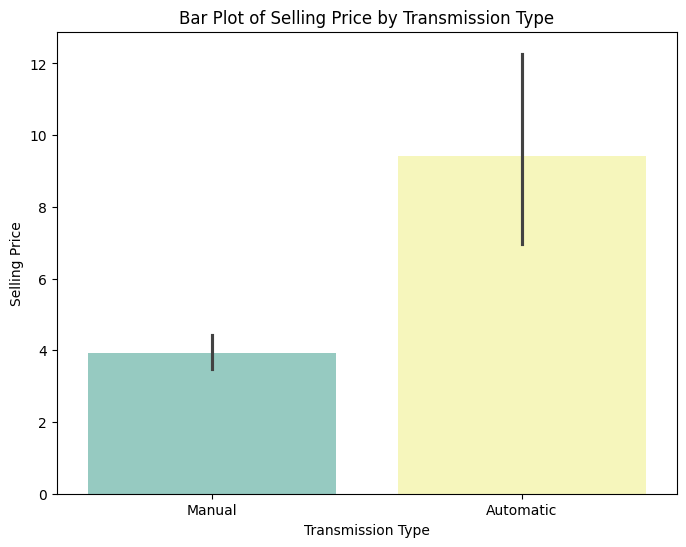

In [13]:
# Bar Plot of Selling Price by Transmission Type
plt.figure(figsize=(8, 6))
sns.barplot(data=car_data, x='Transmission', y='Selling_Price', palette='Set3')
plt.title('Bar Plot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-14-f8ac6c2fb80d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car_data, x='Selling_type', y='Selling_Price', palette='Pastel2')


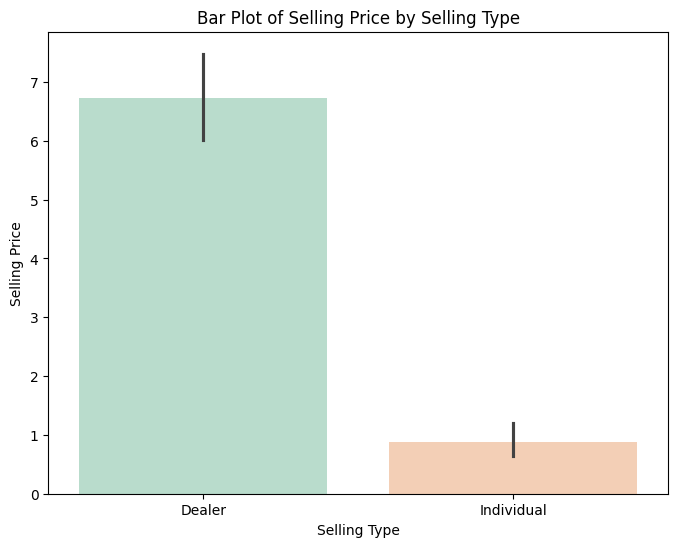

In [14]:
# Bar Plot of Selling Price by Selling Type
plt.figure(figsize=(8, 6))
sns.barplot(data=car_data, x='Selling_type', y='Selling_Price', palette='Pastel2')
plt.title('Bar Plot of Selling Price by Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-15-66b0bc6366a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car_data, x='Year', y='Selling_Price', palette='Pastel1')


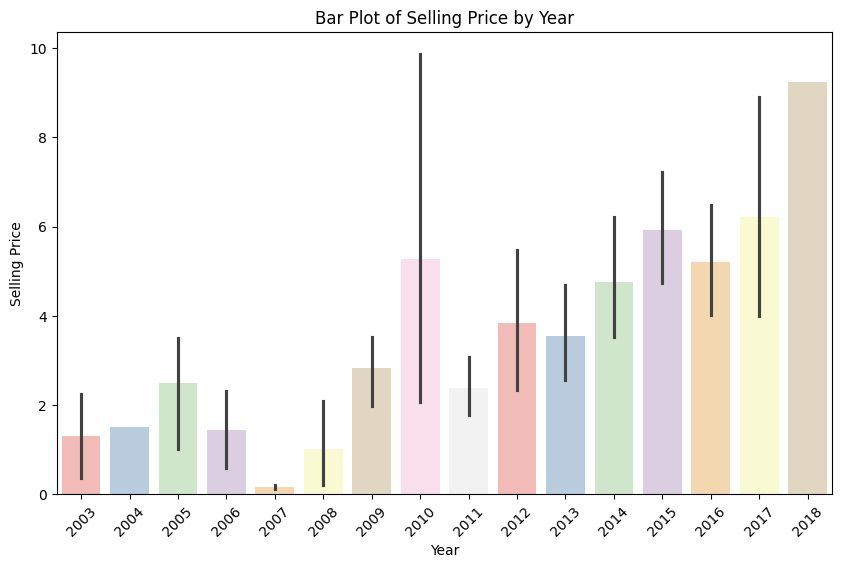

In [15]:
# Bar Plot of Selling Price by Year
plt.figure(figsize=(10, 6))
sns.barplot(data=car_data, x='Year', y='Selling_Price', palette='Pastel1')
plt.title('Bar Plot of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability, otherwise they might be close enough to overlap
plt.show()

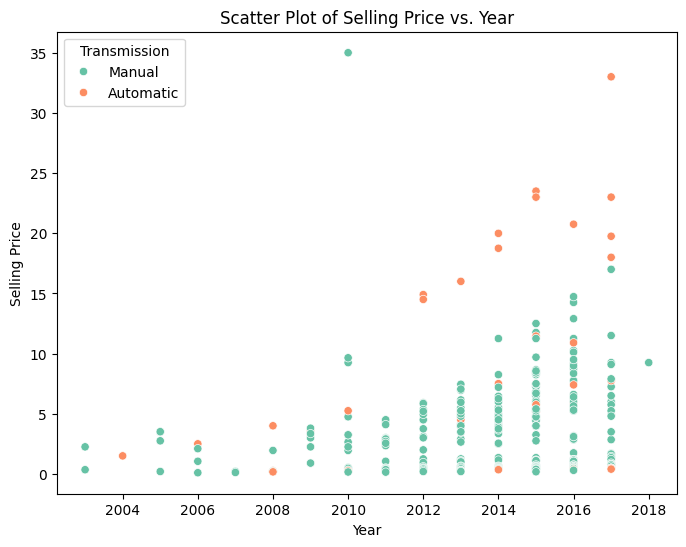

In [16]:
# Scatter Plot of Selling Price vs. Year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data, x='Year', y='Selling_Price', hue='Transmission', palette='Set2')
plt.title('Scatter Plot of Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.legend(title='Transmission')
plt.show()

<ipython-input-17-b2d88c70d95a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_data, x='Fuel_Type', y='Selling_Price', palette='Set2')


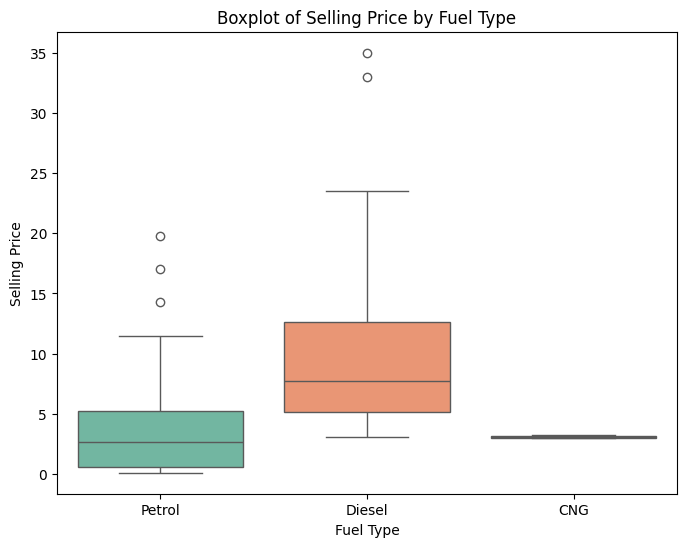

In [17]:
# Boxplot of Selling Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_data, x='Fuel_Type', y='Selling_Price', palette='Set2')
plt.title('Boxplot of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

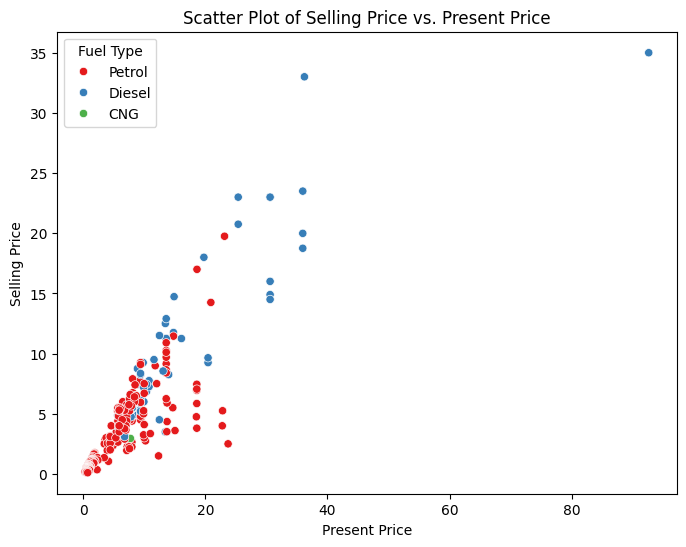

In [18]:
# Scatter Plot of Selling Price vs. Present Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data, x='Present_Price', y='Selling_Price', hue='Fuel_Type', palette='Set1')
plt.title('Scatter Plot of Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

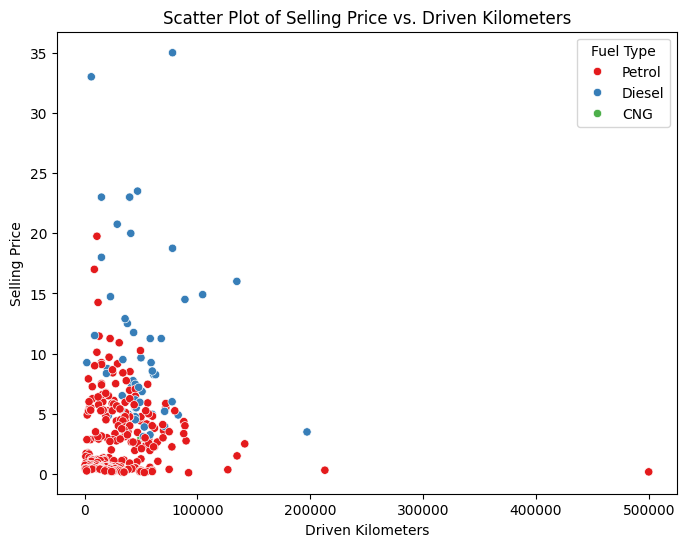

In [19]:
# Scatter Plot of Selling Price vs. Driven Kilometers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data, x='Driven_kms', y='Selling_Price', hue='Fuel_Type', palette='Set1')
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

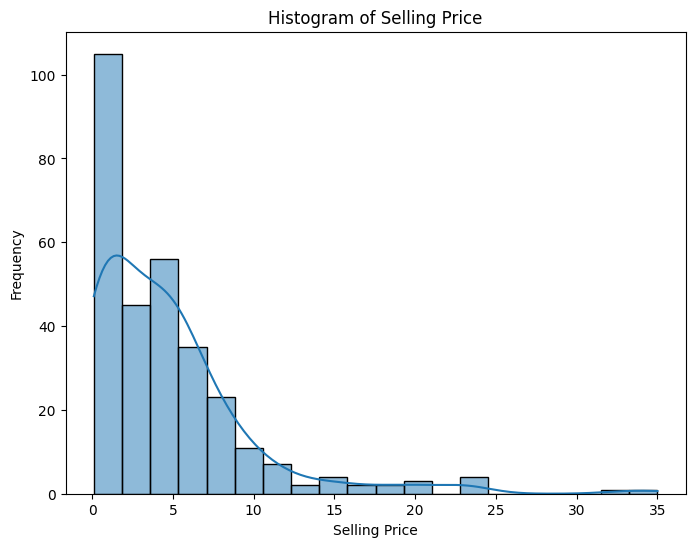

In [20]:
# Histogram of Selling Price
plt.figure(figsize=(8, 6))
sns.histplot(data=car_data, x='Selling_Price', bins=20, kde=True)
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
car_data.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}, 'Selling_type':{'Dealer':0, 'Individual':1}, 'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


Thus, we can see our categorical columns have been succesfully modified.

In [32]:
# Separating data and labels
X = car_data.drop(columns = ['Car_Name','Selling_Price'], axis = 1)
Y = car_data['Selling_Price']

In [33]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [34]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [35]:
# Performing train test splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [37]:
# Here we will use Linear Regression to train our model
model = LinearRegression()

In [38]:
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
training_data_prediction = model.predict(X_train)

In [40]:
# Checking the R squared error
error_score = metrics.r2_score(training_data_prediction, Y_train)
print("R squared error for training data is:", error_score)

R squared error for training data is: 0.8631820252084885


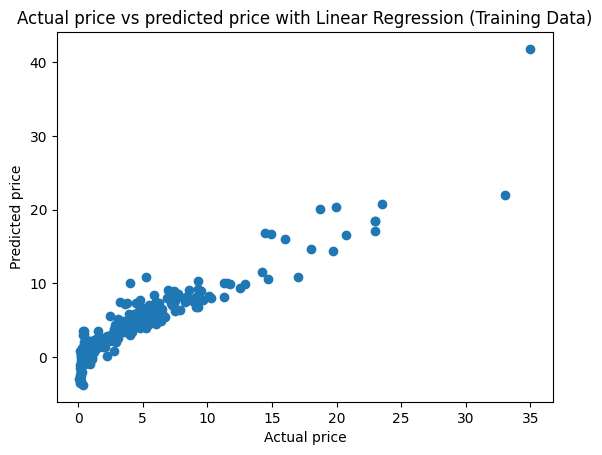

In [56]:
# Visualizing it with help of scatter plots
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price with Linear Regression (Training Data)")
plt.show()

In [43]:
# Repeating the process for testing data
testing_data_prediction = model.predict(X_test)

In [45]:
error_score_new = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error for testing data is:", error_score_new)

R squared error for testing data is: 0.8365861023210703


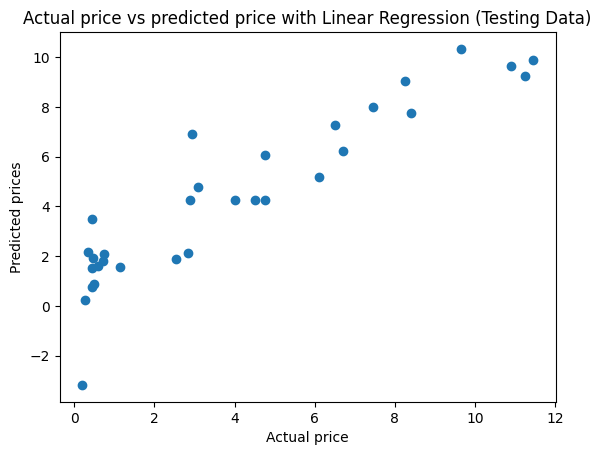

In [57]:
# Visualization through scatterplots
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual price vs predicted price with Linear Regression (Testing Data)")
plt.show()

In [47]:
# Now, we will use Lasso Regression to train and test our model and conclude the best model finally
model_new = Lasso()

In [48]:
model_new.fit(X_train, Y_train)

Lasso()

In [50]:
training_data_prediction_new = model_new.predict(X_train)

In [60]:
error_score_training_lasso = metrics.r2_score(Y_train, training_data_prediction_new)
print("R squared error for training data using Lasso Regression is:", error_score_training_lasso)

R squared error for training data using Lasso Regression is: 0.8424480718240743


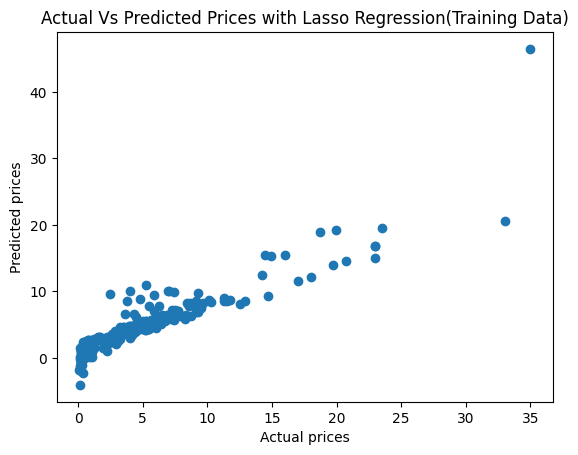

In [63]:
# Visualization through scatterplots
plt.scatter(Y_train, training_data_prediction_new)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Vs Predicted Prices with Lasso Regression(Training Data)")
plt.show()

In [61]:
# Repeating the process for testing data
testing_data_prediction_new = model_new.predict(X_test)

In [62]:
error_score_testing_lasso = metrics.r2_score(Y_test, testing_data_prediction_new)
print("R squared error for testing data using Lasso Regression is:", error_score_testing_lasso)

R squared error for testing data using Lasso Regression is: 0.8709763132343395


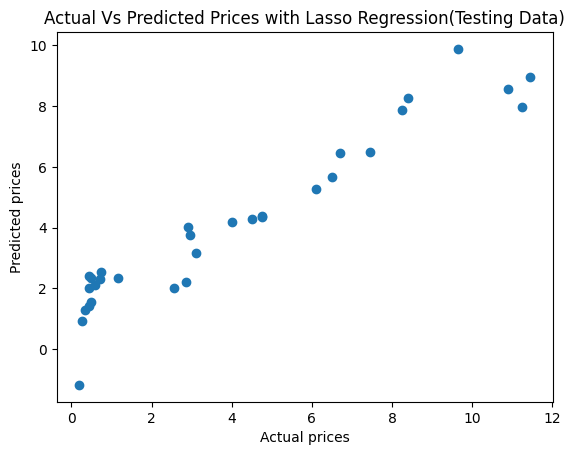

In [64]:
# Visualization through scatterplots
plt.scatter(Y_test, testing_data_prediction_new)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Vs Predicted Prices with Lasso Regression(Testing Data)")
plt.show()

In [65]:
# Building Predictive Systems using Linear Regression. It should come closer to 4.60
input_data = (2014,	6.87,	42450,	1,	0,	0,	0)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

print("The predicted price of the car in lakhs is given by:", prediction)

The predicted price of the car in lakhs is given by: [6.06044794]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
# Building Predictive Systems using Lasso Regression. It should come closer to 4.60
input_data_new = (2014,	6.87,	42450,	1,	0,	0,	0)
input_data_new_as_numpy_array = np.asarray(input_data_new)

input_data_new_reshaped = input_data_new_as_numpy_array.reshape(1,-1)
prediction_lasso = model_new.predict(input_data_new_reshaped)

print("The predicted price of the car in lakhs is given by:", prediction_lasso)

The predicted price of the car in lakhs is given by: [4.37139239]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Thus, Lasso Regression is working better for this model and we can use Lasso Regression with more trust compared to Linear Regression.